In [2]:
import pandas as pd
import numpy as np
import math
from sklearn import model_selection
import platform
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

#연습경기 성정
pre_season = pd.read_csv('../data/Pre_Season_Batter.csv')

#정규시즌 성적을 포함하여 개인정보
regular_season = pd.read_csv('../data/Regular_Season_Batter.csv')

# 타자들의 일자 별 정규시즌 성적
regular_season_batter = pd.read_csv('../data/Regular_Season_Batter_Day_by_Day_b4.csv')

In [3]:
pre_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833


In [4]:
test=regular_season
test.isnull().sum(axis=0)

batter_id             0
batter_name           0
year                  0
team                  0
avg                  26
G                     0
AB                    0
R                     0
H                     0
2B                    0
3B                    0
HR                    0
TB                    0
RBI                   0
SB                    0
CS                    0
BB                    0
HBP                   0
SO                    0
GDP                   0
SLG                  26
OBP                  24
E                     0
height/weight       802
year_born             0
position            802
career                0
starting_salary    1067
OPS                  26
dtype: int64

In [5]:
regular_season_kia = regular_season[regular_season['team'] == '한화']

In [6]:
regular_season['team'] == '한화'

0       False
1        True
2        True
3        True
4        True
        ...  
2449    False
2450    False
2451    False
2452    False
2453    False
Name: team, Length: 2454, dtype: bool

In [7]:
regular_season_kia.sort_values(by = ['batter_id', 'year'])

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.00000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.00000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.34900,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.68600
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.32500,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.67300
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.25700,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.48900
5,1,강경학,2017,한화,0.214,59,84,17,18,2,...,1,0.26200,0.290,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.55200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,332,허도환,2015,한화,0.176,61,91,8,16,7,...,3,0.28600,0.272,3,176cm/87kg,1984년 07월 31일,포수(우투우타),서울학동초-이수중-서울고-단국대-두산-넥센-한화,NaN,0.55800
2379,332,허도환,2016,한화,0.218,48,78,9,17,8,...,2,0.32100,0.315,1,176cm/87kg,1984년 07월 31일,포수(우투우타),서울학동초-이수중-서울고-단국대-두산-넥센-한화,NaN,0.63600
2380,332,허도환,2017,한화,0.225,30,40,4,9,3,...,2,0.37500,0.326,0,176cm/87kg,1984년 07월 31일,포수(우투우타),서울학동초-이수중-서울고-단국대-두산-넥센-한화,NaN,0.70100
2392,334,호잉,2018,한화,0.306,142,529,85,162,47,...,5,0.57300,0.369,4,190cm/92kg,1989년 05월 18일,외야수(우투좌타),미국 Fort Loramie(고)-미국 Toledo(대),300000달러,0.94200


In [8]:
#regular_season_batter_kia = regular_season_batter[regular_season_batter['opposing_team'] == 'KIA']



In [9]:
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)


In [10]:
matplotlib.rcParams['axes.unicode_minus'] = False

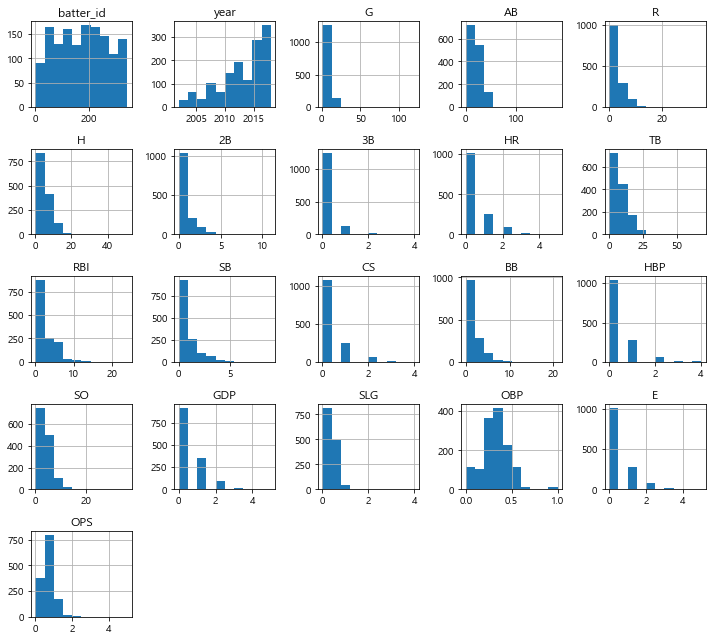

In [11]:
pre_season.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

In [12]:
#정규 시즌 데이터에서 2002 년 이후의 여도별 기록된 선수의 수
regular_count = regular_season.groupby('year')['batter_id'].count().rename('regular')

In [13]:
regular_count

year
1993      1
1994      2
1995      1
1996      7
1997      8
1998     10
1999     14
2000     20
2001     32
2002     43
2003     54
2004     68
2005     73
2006     85
2007     98
2008    115
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: regular, dtype: int64

In [14]:
#연도별 선수
regular_count

year
1993      1
1994      2
1995      1
1996      7
1997      8
1998     10
1999     14
2000     20
2001     32
2002     43
2003     54
2004     68
2005     73
2006     85
2007     98
2008    115
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: regular, dtype: int64

In [15]:
pre_season_count = pre_season.groupby('year')['batter_id'].count().rename('preseason')
pre_season_count

year
2002     12
2003     19
2004     28
2005     37
2006     36
2007     43
2008     61
2009     66
2010     72
2011     75
2012     87
2013    104
2014    117
2015    134
2016    153
2017    167
2018    182
Name: preseason, dtype: int64

In [16]:
#transpose
season_count = pd.concat([regular_count, pre_season_count, np.round(pre_season_count/regular_count, 2).rename('ratio')], axis=1).transpose().loc[:, 2002:]

In [17]:
season_count

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [18]:
#문자열 합치기(정규 시즌)
regular_season['new_idx'] = regular_season['batter_name'] + regular_season['year'].apply(str)
regular_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000,황진수2014
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000,황진수2015
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000,황진수2016
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761,황진수2017


In [19]:
#문자열 합치기(프리시즌 합치기)
pre_season['new_idx'] = pre_season['batter_name']  + pre_season['year'].apply(str)
pre_season['new_idx']

0       가르시아2018
1        강경학2011
2        강경학2014
3        강경학2015
4        강경학2016
          ...   
1388     황재균2014
1389     황재균2015
1390     황재균2016
1391     황재균2018
1392     황진수2014
Name: new_idx, Length: 1393, dtype: object

In [20]:
#교집합 데이터(list, set, intersection 함수 사용) 방법1
intersection_index = list(set(regular_season['new_idx']).intersection(pre_season['new_idx']))
len(intersection_index)

#크기에 대한 이슈
# intersection_index2 = list(set(regular_season['new_idx'] & set(pre_season['new_idx'])))
# len(intersection_index2)

1358

In [21]:

# 반복문으로 교집합 데이터 추출 방법2
regular_season_numpy = regular_season['new_idx'].to_numpy()
pre_season_numpy = pre_season['new_idx'].to_numpy()


listSet = []
for pre in pre_season_numpy:
    for regular in regular_season_numpy:
        if pre == regular:
            listSet.append(pre)
            break

In [22]:
len(listSet)

1358

In [23]:
#방법1, 방법2 결과 동일
intersection_index2 = list(set(listSet) & set(intersection_index))
len(intersection_index2)

1358

In [24]:
listSet

['가르시아2018',
 '강경학2011',
 '강경학2014',
 '강경학2015',
 '강경학2016',
 '강경학2017',
 '강구성2013',
 '강구성2016',
 '강구성2017',
 '김태완2006',
 '김태완2007',
 '김태완2008',
 '김태완2009',
 '김태완2010',
 '김태완2013',
 '김태완2014',
 '김태완2016',
 '김태완2017',
 '김태완2018',
 '강민국2014',
 '강민국2015',
 '강민국2016',
 '강민호2005',
 '강민호2006',
 '강민호2007',
 '강민호2008',
 '강민호2009',
 '강민호2010',
 '강민호2011',
 '강민호2012',
 '강민호2013',
 '강민호2014',
 '강민호2015',
 '강민호2016',
 '강민호2017',
 '강민호2018',
 '강백호2018',
 '강상원2017',
 '강상원2018',
 '강승호2016',
 '강승호2017',
 '강승호2018',
 '강진성2017',
 '강진성2018',
 '강한울2014',
 '강한울2015',
 '강한울2017',
 '강한울2018',
 '신성현2016',
 '신성현2017',
 '신성현2018',
 '고종욱2011',
 '고종욱2015',
 '고종욱2016',
 '고종욱2017',
 '고종욱2018',
 '구자욱2015',
 '구자욱2016',
 '구자욱2017',
 '구자욱2018',
 '국해성2012',
 '국해성2015',
 '국해성2016',
 '국해성2017',
 '국해성2018',
 '권정웅2016',
 '권정웅2017',
 '권정웅2018',
 '권희동2013',
 '권희동2014',
 '권희동2017',
 '권희동2018',
 '김강민2003',
 '김강민2004',
 '김강민2005',
 '김강민2006',
 '김강민2007',
 '김강민2008',
 '김강민2009',
 '김강민2010',
 '김강민2011',
 '김강민2012',
 '김강민2013',
 '김

In [25]:
#내가한 방식

regular_season_new = regular_season[regular_season['new_idx'].isin(listSet)]
regular_season_new.sort_values('new_idx').reset_index(drop=True)

pre_season_new = pre_season[pre_season['new_idx'].isin(listSet)]
pre_season_new = pre_season_new.sort_values('new_idx').reset_index(drop=True)

In [26]:
print(regular_season_new.shape, pre_season_new.shape)

(1358, 30) (1358, 30)


In [27]:
test = regular_season['new_idx'].isin(listSet)

In [28]:
#책에서 한 방식
regular_season_new2 = regular_season.loc[regular_season['new_idx'].apply(lambda x : x in intersection_index2)].copy()
regular_season_new2 = regular_season_new2.sort_values('new_idx').reset_index(drop = True)

pre_season_new2 = pre_season.loc[pre_season['new_idx'].apply(lambda x : x in intersection_index2)].copy()
pre_season_new2 = pre_season_new2.sort_values('new_idx').reset_index(drop = True)

In [29]:
print(pre_season_new2.shape, regular_season_new.shape)

(1358, 30) (1358, 30)


# 상관계수 파악
### 프리시즌, 정규시진은 상관이 없다

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'preseason')

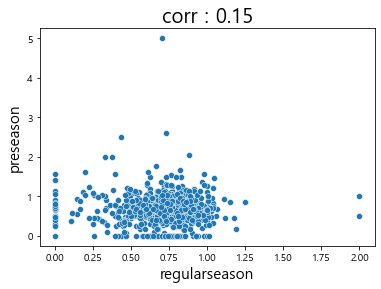

In [30]:

corr = regular_season_new2['OPS'].corr(pre_season_new2['OPS'])
sns.scatterplot(regular_season_new['OPS'], pre_season_new['OPS'])
plt.title("corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)

In [31]:
regular_season.corr()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
batter_id,1.000000,-0.059060,-0.037432,-0.036249,-0.042264,-0.069169,-0.043593,-0.043471,-0.075027,-0.041416,...,-0.049258,-0.068401,-0.067060,-0.024073,-0.061203,-0.013839,-0.036928,-0.033690,-0.058620,-0.039554
year,-0.059060,1.000000,0.047164,-0.002804,-0.007138,0.030349,0.016305,0.020140,-0.018048,0.021358,...,-0.104432,-0.108576,-0.020457,0.005585,0.054268,0.004520,0.048796,0.059733,-0.080026,0.054094
avg,-0.037432,0.047164,1.000000,0.486049,0.493054,0.488481,0.521170,0.485083,0.268319,0.370007,...,0.255881,0.293852,0.448144,0.327718,0.416041,0.402419,0.868183,0.898050,0.259142,0.919696
G,-0.036249,-0.002804,0.486049,1.000000,0.931613,0.859570,0.892624,0.833705,0.488191,0.632064,...,0.489876,0.575591,0.814841,0.640272,0.862002,0.757007,0.516975,0.486954,0.577912,0.534539
AB,-0.042264,-0.007138,0.493054,0.931613,1.000000,0.946174,0.985374,0.924361,0.533750,0.728135,...,0.545551,0.617874,0.891425,0.665467,0.888006,0.807997,0.540886,0.483047,0.573509,0.546879
R,-0.069169,0.030349,0.488481,0.859570,0.946174,1.000000,0.961276,0.907399,0.571925,0.769227,...,0.610985,0.633020,0.895176,0.656564,0.836260,0.718449,0.556065,0.488408,0.508033,0.558242
H,-0.043593,0.016305,0.521170,0.892624,0.985374,0.961276,1.000000,0.939350,0.535429,0.751363,...,0.541087,0.602168,0.894687,0.649509,0.848227,0.796256,0.566842,0.503413,0.535391,0.571506
2B,-0.043471,0.020140,0.485083,0.833705,0.924361,0.907399,0.939350,1.000000,0.468033,0.746644,...,0.453971,0.519506,0.839813,0.619308,0.817390,0.755878,0.566631,0.470049,0.519853,0.556933
3B,-0.075027,-0.018048,0.268319,0.488191,0.533750,0.571925,0.535429,0.468033,1.000000,0.205052,...,0.608751,0.588569,0.436684,0.290162,0.446949,0.263779,0.261314,0.244860,0.291324,0.269084
HR,-0.041416,0.021358,0.370007,0.632064,0.728135,0.769227,0.751363,0.746644,0.205052,1.000000,...,0.208335,0.263538,0.749476,0.597497,0.747049,0.649441,0.575835,0.385169,0.382102,0.525660


# 2장 시작|

In [32]:
regular_season = pd.read_csv('../data/Regular_Season_Batter.csv')

In [33]:
regular_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,0,0.000,0.000,0,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,2,0.402,0.359,4,181cm/82kg,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761


In [34]:
print(regular_season.shape, '\n'
      ,regular_season.describe())

(2454, 29) 
          batter_id         year          avg            G           AB  \
count  2454.000000  2454.000000  2428.000000  2454.000000  2454.000000   
mean    178.079462  2011.614507     0.237559    72.535045   201.514670   
std      97.557947     4.992833     0.098440    45.093871   169.537029   
min       0.000000  1993.000000     0.000000     1.000000     0.000000   
25%     101.250000  2008.000000     0.203000    28.000000    38.250000   
50%     183.000000  2013.000000     0.255000    79.000000   163.000000   
75%     265.000000  2016.000000     0.291000   115.000000   357.500000   
max     344.000000  2018.000000     1.000000   144.000000   600.000000   

                 R            H           2B           3B           HR  ...  \
count  2454.000000  2454.000000  2454.000000  2454.000000  2454.000000  ...   
mean     29.912388    55.988183     9.863488     0.957620     5.504075  ...   
std      28.778759    52.253844     9.871314     1.647193     7.989380  ...   
min 

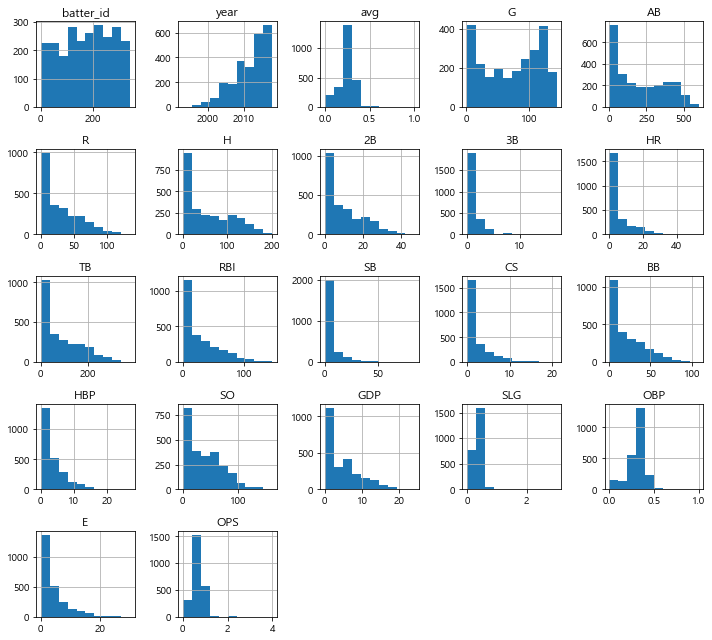

In [35]:
regular_season.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

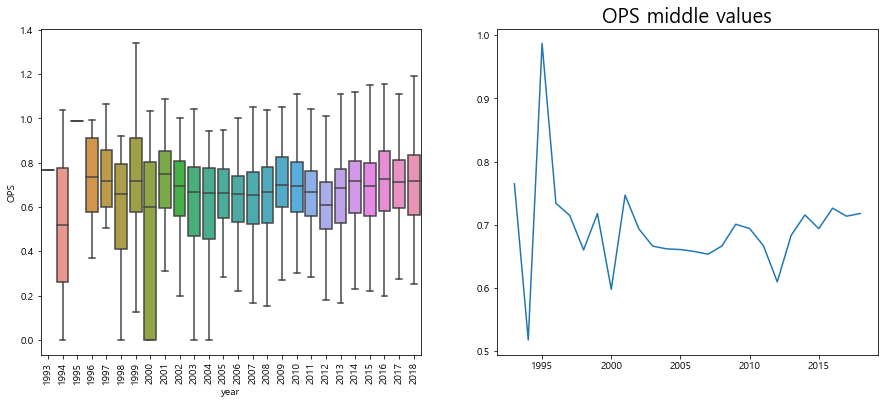

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
g = sns.boxplot(x="year", y = "OPS", data = regular_season, showfliers=False)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(1, 2, 2)
plt.plot(regular_season.groupby('year')['OPS'].median())
plt.title("OPS middle values", size = 20)
plt.show()

In [37]:
#데이터 베이스 행과렬 변경하는것 즉 전치 행렬과 비슷한 개념??
pd.crosstab(index = regular_season['year'], columns ='count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


In [38]:
#regular_season.loc[regular_season['year'] == 1993]
regular_season.loc[regular_season['year'] == 1994]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
1322,228,이종범,1994,해태,0.393,124,499,113,196,27,...,2,0.581162,0.455036,27,NaN,1970년 08월 15일,NaN,서림초-충장중-광주제일고-건국대-해태-KIA,NaN,1.036198
2196,304,최동수,1994,LG,0.000,1,1,0,0,0,...,0,0.000000,0.000000,0,NaN,1971년 09월 11일,NaN,봉천초-강남중-광영고-중앙대-LG-SK-LG,NaN,0.000000


In [39]:
med_OPS_team = pd.pivot_table(regular_season, index = 'team', columns='year', values='OPS', aggfunc='median')

team_index = med_OPS_team.loc[:, 2005 :].isna().sum(axis=1) <= 0

In [40]:
team_index

team
KIA      True
KT      False
LG       True
NC      False
OB      False
SK       True
넥센      False
두산       True
롯데       True
삼성       True
쌍방울     False
우리      False
한화       True
해태      False
현대      False
히어로즈    False
dtype: bool

In [41]:
med_OPS_team

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
team,,,,,,,,,,,,,,,,,,,,,
KIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849337,0.829906,...,0.707000,0.725000,0.680963,0.615420,0.679763,0.751196,0.598500,0.777000,0.777000,0.7320
KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.643561,0.634500,0.710791,0.6550
LG,NaN,0.000000,NaN,0.476212,0.679836,0.509843,0.637173,0.689250,0.698978,0.645345,...,0.704000,0.677000,0.626000,0.552501,0.653000,0.680809,0.678000,0.729000,0.703000,0.7040
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.652500,0.636742,0.711000,0.703000,0.705000,0.6000
OB,NaN,NaN,NaN,NaN,0.615797,0.727667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.596491,0.393000,...,0.822977,0.689176,0.710000,0.666953,0.689636,0.751500,0.714000,0.798500,0.764796,0.7685
넥센,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.636166,0.623000,0.589000,0.671000,0.792032,0.753000,0.800500,0.743500,0.7650
두산,NaN,NaN,NaN,NaN,NaN,NaN,0.853830,0.739755,0.695808,0.762809,...,0.701938,0.780000,0.733000,0.660000,0.781500,0.702330,0.760000,0.763000,0.685000,0.8230
롯데,NaN,NaN,NaN,NaN,NaN,NaN,1.124961,0.453390,0.577847,0.577000,...,0.680000,0.653000,0.676715,0.581845,0.600000,0.689000,0.622000,0.704000,0.728000,0.7100


In [42]:
team_index_df = med_OPS_team.loc[team_index].T
team_index_df

team,KIA,LG,SK,두산,롯데,삼성,한화
year,,,,,,,
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,0.476212,NaN,NaN,NaN,NaN,0.890260
1997,NaN,0.679836,NaN,NaN,NaN,NaN,0.768116
1998,NaN,0.509843,NaN,NaN,NaN,NaN,0.456915
1999,NaN,0.637173,NaN,0.853830,1.124961,0.575549,0.512775
2000,NaN,0.689250,0.000000,0.739755,0.453390,0.369048,0.478132
2001,0.849337,0.698978,0.596491,0.695808,0.577847,0.830124,0.870676


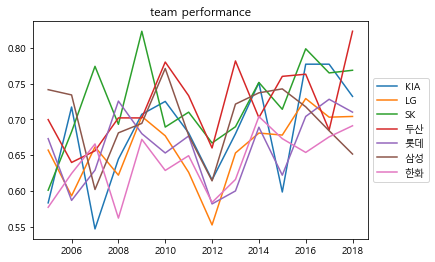

In [43]:
plt.plot(team_index_df.loc[2005:, :])
plt.legend(team_index_df.loc[2005:, :].columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('team performance')
plt.show()

# 키/몸무게 상관관계 파악하기

In [44]:
height_weight = regular_season['height/weight']
regular_season['height/weight']

0       177cm/93kg
1       180cm/72kg
2       180cm/72kg
3       180cm/72kg
4       180cm/72kg
           ...    
2449    181cm/82kg
2450    181cm/82kg
2451    181cm/82kg
2452    181cm/82kg
2453    181cm/82kg
Name: height/weight, Length: 2454, dtype: object

In [45]:
import math

weight = []
height = []

DictList = {}
print(DictList)
for index in height_weight.index:
    #print(type(h_w_np[index]))
    if str == type(height_weight[index]):
        value = height_weight[index].split('/')
        print(value[0], value[1])
        weight_notKg = value[1].split('k')[0]
        height_notCm = value[0].split('c')[0]
        weight.append(float(weight_notKg))
        height.append(float(height_notCm))

    elif math.isnan(height_weight[index]):
        weight.append(height_weight[index])
        height.append(height_weight[index])

regular_season['weight'] = weight
regular_season['height'] = height
regular_season['weight_per_height'] = regular_season['weight'].astype(float) / regular_season['height'].astype(float)

{}
177cm 93kg
180cm 72kg
180cm 72kg
180cm 72kg
180cm 72kg
180cm 72kg
180cm 72kg
180cm 82kg
180cm 82kg
180cm 82kg
180cm 82kg
180cm 82kg
176cm 80kg
176cm 80kg
176cm 80kg
176cm 80kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
185cm 100kg
184cm 98kg
172cm 64kg
172cm 64kg
179cm 77kg
179cm 77kg
179cm 77kg
180cm 81kg
180cm 81kg
180cm 81kg
181cm 66kg
181cm 66kg
181cm 66kg
181cm 66kg
181cm 66kg
178cm 68kg
184cm 83kg
184cm 83kg
184cm 83kg
184cm 83kg
184cm 83kg
184cm 83kg
189cm 75kg
189cm 75kg
189cm 75kg
189cm 75kg
180cm 94kg
180cm 94kg
180cm 94kg
180cm 94kg
180cm 94kg
180cm 88kg
180cm 88kg
180cm 88kg
177cm 85kg
177cm 85kg
177cm 85kg
177cm 85kg
177cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
182cm 85kg
188cm 85kg
188cm 85kg
184cm 80kg
184

In [46]:
regular_season.loc[:,['height/weight', 'height', 'weight', 'weight_per_height']]

,height/weight,height,weight,weight_per_height
0,177cm/93kg,177.0,93.0,0.525424
1,180cm/72kg,180.0,72.0,0.400000
2,180cm/72kg,180.0,72.0,0.400000
3,180cm/72kg,180.0,72.0,0.400000
4,180cm/72kg,180.0,72.0,0.400000
...,...,...,...,...
2449,181cm/82kg,181.0,82.0,0.453039
2450,181cm/82kg,181.0,82.0,0.453039
2451,181cm/82kg,181.0,82.0,0.453039
2452,181cm/82kg,181.0,82.0,0.453039


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


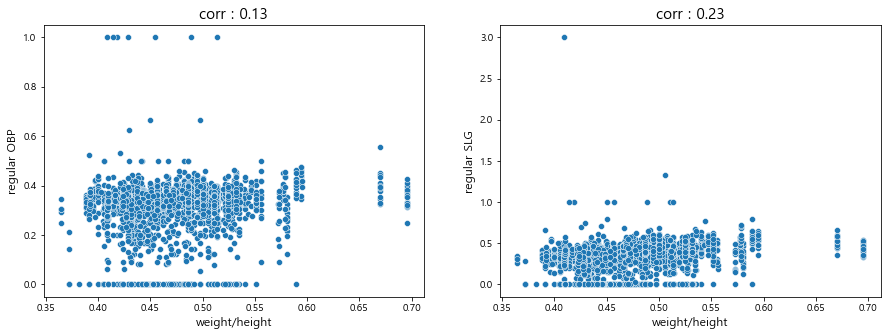

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
corr = regular_season['weight_per_height'].corr(regular_season['OBP'])
sns.scatterplot(regular_season['weight_per_height'], regular_season['OBP'])

plt.title("corr : " + str(np.round(corr, 2)), fontsize=15)
plt.ylabel('regular OBP', fontsize= 12)
plt.xlabel('weight/height', fontsize= 12)

plt.subplot(1,2,2)
corr = regular_season['weight_per_height'].corr(regular_season['SLG'])
sns.scatterplot(regular_season['weight_per_height'], regular_season['SLG'])
plt.title("corr : " + str(np.round(corr, 2)), fontsize=15)
plt.ylabel('regular SLG', fontsize= 12)
plt.xlabel('weight/height', fontsize= 12)

plt.show()

# 포지션, 타석 방법 나누기

In [48]:
regular_season['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [49]:
position = regular_season['position']

hit = []
pos = []

for index in position.index:
    if str == type(position[index]):
        value = position[index].split('(')
        hit.append(value[1][2:4])
        pos.append(value[0])


    elif math.isnan(position[index]):
        hit.append(position[index])
        pos.append(position[index])
regular_season['hit_way'] = hit
regular_season['pos'] = pos
regular_season.shape



(2454, 34)

In [50]:
regular_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,year_born,position,career,starting_salary,OPS,weight,height,weight_per_height,hit_way,pos
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,93.0,177.0,0.525424,우타,내야수
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,72.0,180.0,0.400000,좌타,내야수
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,72.0,180.0,0.400000,좌타,내야수
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,72.0,180.0,0.400000,좌타,내야수
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,72.0,180.0,0.400000,좌타,내야수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,1989년 02월 15일,내야수(우투양타),석천초-대헌중-공주고,4000만원,0.761,82.0,181.0,0.453039,양타,내야수


pos 수 : {'내야수': 827, '외야수': 622, '포수': 203}, pos중앙값: {'내야수': 0.706, '외야수': 0.7190000000000001, '포수': 0.639}
hit_way 수 : {'우타': 1062, '좌타': 576, '양타': 14}, hit_way 중앙값: {'양타': 0.63, '우타': 0.7, '좌타': 0.7130000000000001}


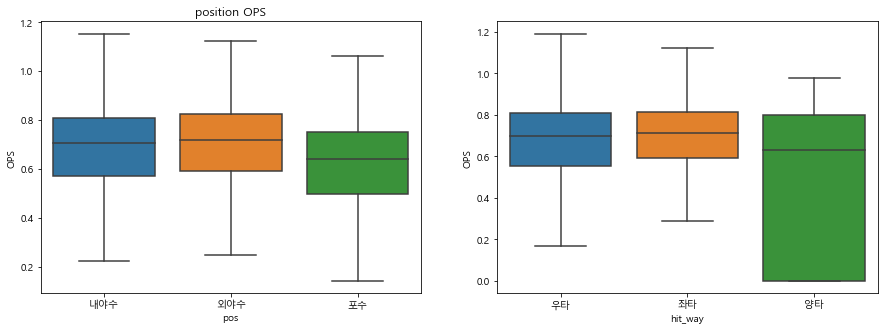

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

ax = sns.boxplot(x="pos", y="OPS", data=regular_season, showfliers=False)

#position 별 OPS 중앙값
medians = regular_season.groupby('pos')['OPS'].median().to_dict()
nobs = regular_season['pos'].value_counts().to_dict()

print(f"pos 수 : {nobs}, pos중앙값: {medians}")

ax.set_title('position OPS')

plt.subplot(1,2,2)

ax = sns.boxplot(x='hit_way', y='OPS', data=regular_season, showfliers=False)

#타자 방향별 OPS 중앙값
medians = regular_season.groupby(['hit_way'])['OPS'].median().to_dict()
nobs = regular_season['hit_way'].value_counts().to_dict()

print(f"hit_way 수 : {nobs}, hit_way 중앙값: {medians}")

In [52]:
#null 체크를 하는 방법 직접!!
#regular_season.isnull().sum(axis=0)

#null 체크
#regular_season[regular_season['career'].isnull()]

In [53]:
test = regular_season['career'][0].split('-')
career = regular_season['career']


country = []
for index in career.index:
    if str == type(career[index]):
        splits = career[index].split('중')
        if len(splits) > 1:
            country.append('korea')
        else:
            country.append('foreign')
    else:
        country.append(career[index])

len(country)

regular_season['country'] = country
# for index in h_w_np.index:
#     #print(type(h_w_np[index]))
#     if str == type(h_w_np[index]):
#         value = h_w_np[index].split('/')
#         print(value[0], value[1])
#         weight_notKg = value[1].split('k')[0]
#         height_notCm = value[0].split('c')[0]
#         weight.append(float(weight_notKg))
#         height.append(float(height_notCm))
#
#     elif math.isnan(h_w_np[index]):
#         weight.append(h_w_np[index])
#         height.append(h_w_np[index])



중앙값 : {'foreign': 0.9086557775003468, 'korea': 0.685}, 한국/외국 : {'korea': 2420, 'foreign': 34}


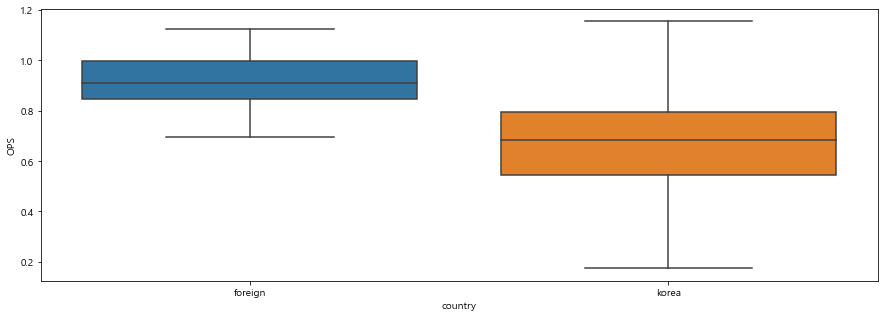

In [54]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(x='country', y = 'OPS', data=regular_season, showfliers=False)

medians = regular_season.groupby('country')['OPS'].median().to_dict()
nobs = regular_season['country'].value_counts().to_dict()
print(f"중앙값 : {medians}, 한국/외국 : {nobs}")

In [55]:
regular_season['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

In [56]:
from numpy import nan as NA

starting_salary = regular_season['starting_salary']

starting_salary_list = []
for index in starting_salary.index:
    if type(starting_salary[index]) == str:
        temp = starting_salary[index].split('만원')
        if len(temp) > 1:
            starting_salary_list.append(temp[0])
        else:
            starting_salary_list.append(NA)
            continue
    else:
        starting_salary_list.append(NA)

regular_season['starting_salary_list'] = starting_salary_list

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


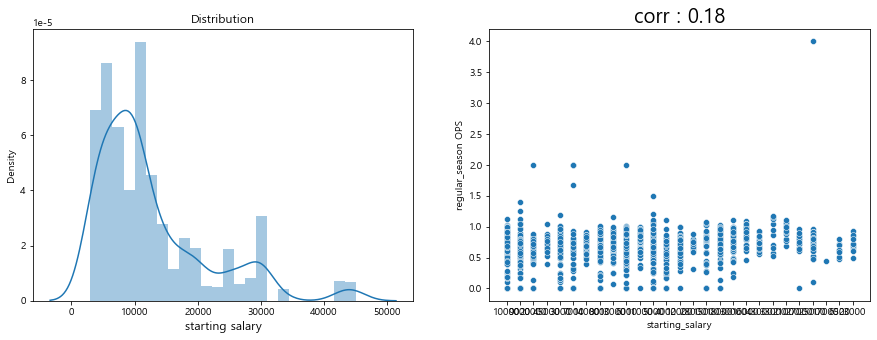

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

# b= sns.distplot(starting_salary_list, hist=True)
b= sns.distplot(regular_season['starting_salary_list'].loc[regular_season['starting_salary_list'].notnull()], hist=True)
b.set_xlabel('starting salary', fontsize=12)
b.set_title('Distribution', fontsize=12)

corr = regular_season['starting_salary_list'].astype(float).corr(regular_season['OPS'])

plt.subplot(1,2,2)
b= sns.scatterplot(regular_season['starting_salary_list'], regular_season['OPS'])
b.axes.set_title('corr : '+ str(np.round(corr,2)), fontsize=20)
b.set_xlabel('starting_salary')
b.set_ylabel('regular_season OPS')
plt.show()


In [58]:
regular_season['starting_salary_list'].value_counts()

10000    177
6000     117
3000     105
9000      97
5000      91
8000      89
30000     74
4000      62
12000     62
18000     54
7000      53
11000     49
13000     48
20000     46
25000     45
15000     41
16000     28
14000     26
28000     20
43000     17
45000     16
27000     15
21000     13
23000     12
33000     10
6500      10
17000      1
Name: starting_salary_list, dtype: int64

# 일별 데이터 분석

In [59]:
day_by_day_of = pd.read_csv('../data/Regular_Season_Batter_Day_by_Day_b4.csv')
#print(day_by_day_of.shape, day_by_day_of.head())

#apply 축을 기준으로 옵션을 정하는것!!

def day(x):
    return str(x).split('.')[0]

TEST=list(map(lambda x: x ** 2, range(5)))
#day_by_day_of['date'].apply(lambda x : str(x).split('.')[0])
day_by_day_of['month'] = day_by_day_of['date'].apply(day)

In [60]:
#day_by_day_of['month']
print(list(TEST))

[0, 1, 4, 9, 16]


In [61]:
#day_by_day_of['date'].apply(lambda x : str(x).split('.')[0])
day_by_day_of['date'].apply(day)

0         3
1         3
2         3
3         3
4         3
         ..
112268    6
112269    6
112270    6
112271    6
112272    6
Name: date, Length: 112273, dtype: object

In [62]:
#sub쿼리 만들어서 테이블 만들기
agg_df = day_by_day_of.groupby(['year', 'month'])['avg2'].mean().reset_index()
agg_df

,year,month,avg2
0,2001,10,0.356400
1,2001,4,0.205217
2,2001,5,0.297157
3,2001,6,0.306926
4,2001,7,0.293171
...,...,...,...
129,2018,5,0.274083
130,2018,6,0.280630
131,2018,7,0.280817
132,2018,8,0.283923


In [63]:
agg_df_pivot_table = agg_df.pivot_table(index = ['month'], columns=['year'], values=['avg2'])
agg_df_pivot_table

avg2                                                              \
year       2001      2002      2003      2004      2005      2006      2007   
month                                                                         
10     0.356400  0.269065  0.216583  0.203636       NaN  0.260985  0.249888   
3           NaN       NaN       NaN       NaN       NaN  0.261714  0.261714   
4      0.205217  0.319792  0.250296  0.259663  0.235317  0.267106  0.215703   
5      0.297157  0.267990  0.241491  0.237954  0.253527  0.264283  0.237329   
6      0.306926  0.275867  0.252290  0.248800  0.249913  0.264392  0.260600   
7      0.293171  0.266650  0.244230  0.251973  0.256396  0.262464  0.259171   
8      0.303489  0.270481  0.252319  0.249460  0.243570  0.265369  0.270258   
9      0.308636  0.248333  0.243780  0.203953  0.237058  0.258794  0.251022   

                                                                             \
year       2008      2009      2010      2011      2012      2013      2014   
month                                                                         
10     0.249638  0.033333       NaN  0.243526  0.246949  0.257841  0.273537   
3      0.271982       NaN  0.239861       NaN       NaN  0.231236  0.210598   
4      0.261531  0.252546  0.262953  0.247133  0.234199  0.267994  0.259918   
5      0.262535  0.280842  0.272934  0.250877  0.247844  0.268355  0.273899   
6      0.270766  0.278781  0.274791  0.263264  0.254577  0.270533  0.283480   
7      0.264870  0.275054  0.265501  0.264829  0.261513  0.262812  0.275677   
8      0.265173  0.271796  0.271075  0.262048  0.258069  0.268122  0.282025   
9      0.252942  0.264468  0.265312  0.258500  0.251232  0.260571  0.272411   

                                               
year       2015      2016      2017      2018  
month                                          
10     0.274042  0.282547  0.280289  0.277482  
3      0.214485  0.257857  0.161979  0.238015  
4      0.255175  0.266711  0.259430  0.263953  
5      0.261307  0.275240  0.274374  0.274083  
6      0.268999  0.276307  0.279060  0.280630  
7      0.272685  0.283192  0.284565  0.280817  
8      0.272377  0.283105  0.283283  0.283923  
9      0.271629  0.276513  0.273213  0.277841

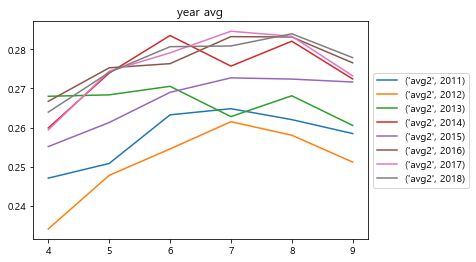

In [64]:
#print(agg_df_pivot_table.iloc[2:, 10:])
plt.plot(agg_df_pivot_table.iloc[2:, 10:])
plt.legend(agg_df_pivot_table.iloc[2:, 10:].columns, loc='center left', bbox_to_anchor=(1,0.5))
plt.title('year avg')
plt.show()

In [65]:
regular_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,career,starting_salary,OPS,weight,height,weight_per_height,hit_way,pos,country,starting_salary_list
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,93.0,177.0,0.525424,우타,내야수,foreign,NaN
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,광주대성초-광주동성중-광주동성고,10000만원,0.000,72.0,180.0,0.400000,좌타,내야수,korea,10000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,광주대성초-광주동성중-광주동성고,10000만원,0.686,72.0,180.0,0.400000,좌타,내야수,korea,10000
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,광주대성초-광주동성중-광주동성고,10000만원,0.673,72.0,180.0,0.400000,좌타,내야수,korea,10000
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,광주대성초-광주동성중-광주동성고,10000만원,0.489,72.0,180.0,0.400000,좌타,내야수,korea,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,석천초-대헌중-공주고,4000만원,0.000,82.0,181.0,0.453039,양타,내야수,korea,4000
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,석천초-대헌중-공주고,4000만원,0.761,82.0,181.0,0.453039,양타,내야수,korea,4000


In [66]:
day_by_day_of.to_csv('Regular_Season_Batter_Day_by_Day_b42.csv')

In [67]:
pre_season_new.to_csv('Pre_Season_Batter2.csv')